In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
vx1 = pd.read_csv('data/VX1.csv')
vx2 = pd.read_csv('data/VX2.csv')
xiv = pd.read_csv('data/XIV.csv')

In [3]:
# trim data columns
vx1_trim = vx1[['Trade Date', 'Settle']]
vx2_trim = vx2[['Trade Date', 'Settle']]
xiv_trim = xiv[['Date', 'Open']]

In [4]:
# rename columns for clarity
vx1_trim = vx1_trim.rename(columns={'Trade Date':'Date','Settle':'M1'})
vx2_trim = vx2_trim.rename(columns={'Trade Date':'Date','Settle':'M2'})

In [5]:
# merge VIX data into one DateFrame by date
vix = pd.merge(vx1_trim, vx2_trim, on='Date')

In [7]:
# calculate the contango
vix['contango'] = (vix['M2'] / vix['M1'])-1

In [8]:
# convert date strings to DateTime objects
vix['Date'] = pd.to_datetime(vix['Date'])
xiv['Date'] = pd.to_datetime(xiv['Date'])

In [9]:
# filter vix to dates after 2016
vix = vix[vix['Date'].dt.year >= 2017]

In [11]:
# initialize blank columns
vix['t-val'] = np.nan
vix['p-change'] = np.nan
xiv['p-close'] = np.nan
xiv['p-open'] = np.nan

In [13]:
# caclulate contango, theoretical value, and percent change for VIX
vix.at[len(vix)-1,'t-val'] = 1
for i in range(len(vix)-2,-1,-1):
    percent = (vix['contango'][i+1]/20)
    vix.at[i,'t-val'] = vix['t-val'][i+1]*(1+percent)
    vix.at[i,'p-change'] = percent

In [14]:
# calculate daily percent change for XIV open & close
for i in range(len(xiv)-2,-1,-1):
    p_close = (xiv.at[i, 'Close'] - xiv.at[i+1, 'Close']) / xiv.at[i+1, 'Close']
    p_open  = (xiv.at[i, 'Open']  - xiv.at[i+1, 'Open'])  / xiv.at[i+1, 'Open']
    xiv.at[i,'p-close'] = p_close
    xiv.at[i,'p-open']  = p_open

In [25]:
# merge VIX and XIV by date for comparison
master = pd.merge(vix, xiv, on='Date')
master['open20'] = master['Open']/20

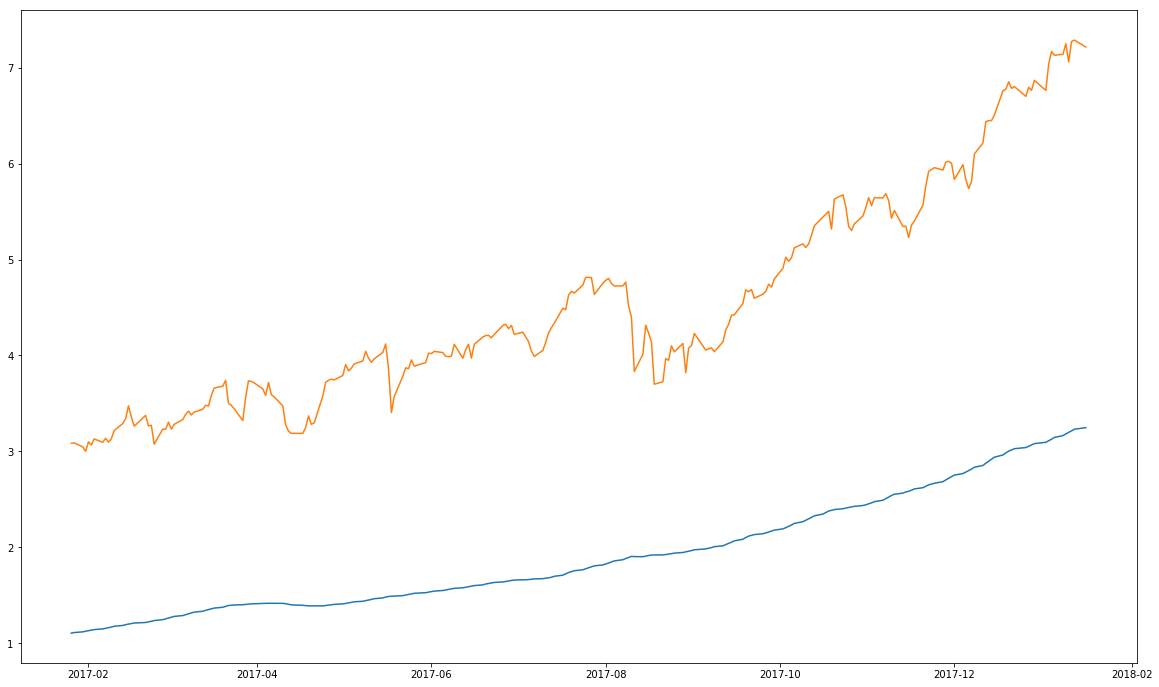

In [26]:
plt.figure(figsize=(20, 12))
plt.plot(master['Date'],master[['t-val', 'open20']])

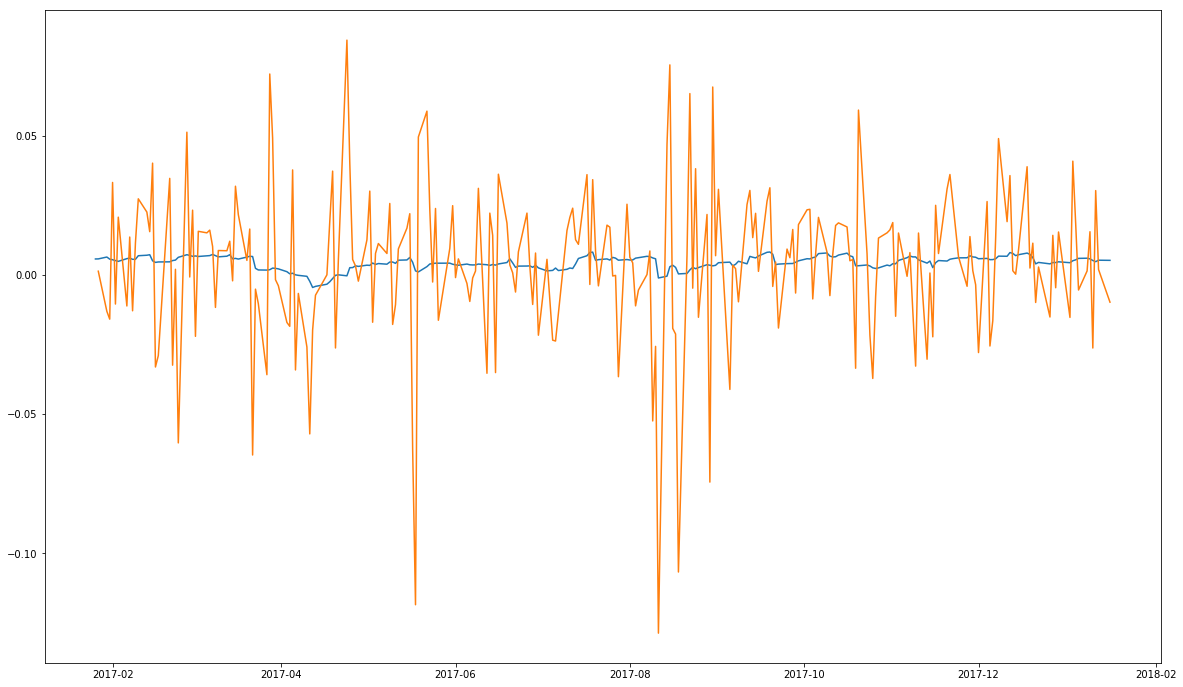

In [27]:
plt.figure(figsize=(20, 12))
plt.plot(master['Date'],master[['p-change', 'p-open']])